In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


# Applying Survival model

## 1. 학습하기

## 1-1. Cox Proportional Hazard Model

In [3]:
X_imputed = pd.read_csv('imputed features_final.csv')
Real_Gas = pd.read_csv('Real target.csv')

In [4]:
sub_list = list(Real_Gas['SubjectID'])

In [5]:
X_imputed = X_imputed[['SubjectID','Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory']]

In [6]:
X_imputed.query("SubjectID == {0}".format(sub_list), inplace=True)
sub_list_2 = list(X_imputed['SubjectID'])
X_imputed = X_imputed.reset_index()
X_imputed.drop(columns=['index'], inplace=True)

In [7]:
Real_Gas.query("SubjectID == {0}".format(sub_list_2), inplace=True)
Real_Gas = Real_Gas.reset_index()
Real_Gas = Real_Gas.iloc[:, 1:]
Real_Gas.drop(columns='Unnamed: 0', inplace=True)

In [8]:
X_1 = X_imputed.merge(Real_Gas, on='SubjectID', how='inner')

In [9]:
y = X_1[['status_real']]
X_1.drop(columns='SubjectID', inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(X_1, y, train_size=0.8, test_size=0.2, random_state=11)

모델 적용하기

In [12]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train, 'time_real', event_col='status_real')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2354 total observations, 1977 right-censored observations>
             duration col = 'time_real'
                event col = 'status_real'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 2354
number of events observed = 377
   partial log-likelihood = -2493.85
         time fit was run = 2021-05-16 17:10:48 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.02       1.02       0.00             0.01             0.03                 1.01                 1.03
Gender                         -0.21       0.81       0.10            -0.41            -0.00                 0.66                 1.00
onset_site                      0.57       1.77       0.15             0.27             0.87                 1.31                 2.39
onset_delta                     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diag_minus_onset               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot                0.50       1.65       1.82            -3.07             4.07                 0.05                58.60
fvc_slope                      -0.07       0.94       0.15            -0.35             0.22                 0.70                 1.25
fvc_mean                       -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
mean_Q10_Respiratory            0.06       1.06       0.08            -0.10             0.23                 0.90                 1.26
mean_Bulbar                    -0.41       0.66       0.04            -0.48            -0.34                 0.62                 0.71
mean_motor                     -0.06       0.95       0.01            -0.08            -0.03                 0.92                 0.97
slope_Q1_Speech                -4.48       0.01       2.97           -10.30             1.34                 0.00                 3.80
slope_Q2_Salivation            -5.16       0.01       3.53           -12.07             1.76                 0.00                 5.80
slope_Q3_Swallowing            -7.22       0.00       3.90           -14.86             0.42                 0.00                 1.52
slope_Q4_Handwriting            4.81     122.94       3.40            -1.84            11.47                 0.16             95403.22
slope_Q5_Cutting                0.27       1.32       2.92            -5.45             6.00                 0.00               401.59
slope_Q6_Dressing_and_Hygiene  -2.85       0.06       3.79           -10.27             4.58                 0.00                97.05
slope_Q7_Turning_in_Bed         4.14      62.92       1.65             0.91             7.38                 2.48              1599.14
slope_Q8_Walking               -9.56       0.00       4.63           -18.63            -0.50                 0.00                 0.61
slope_Q9_Climbing_Stairs       -1.05       0.35       3.04            -7.01             4.92                 0.00               136.62
slope_Q10_Respiratory           6.66     777.30       3.45            -0.10            13.41                 0.91             6.67e+05

                                   z      p   -log2(p)
covariate                                             
Age                             3.91 <0.005      13.42
Gender                         -1.99   0.05       4.42
onset_site                      3.73 <0.005      12.33
onset_delta                     3.09 <0.005       8.94
diag_minus_onset               -0.70   0.49       1.04
slope_alsfrs_tot                0.27   0.78       0.35
fvc_slope        

<AxesSubplot:xlabel='log(HR) (95% CI)'>

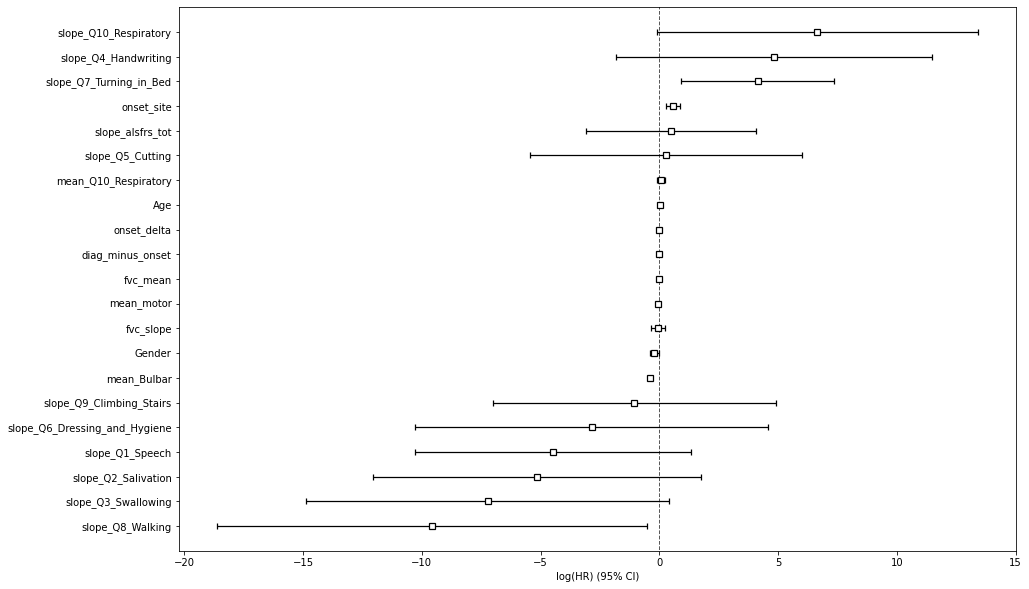

In [13]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함

## 1-2. Random Survival Forest model

In [14]:
conda install -c sebp scikit-survival

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
from sksurv.ensemble import RandomSurvivalForest

In [16]:
dic = {1:True, 0:False}

df_train_rsf = df_train.iloc[:, -2:][['status_real', 'time_real']]
df_train_rsf = df_train_rsf.replace({'status_real':dic})

In [17]:
arr_1 = list(tuple(x) for x in df_train_rsf.to_records(index=False))
dt=np.dtype('bool, float')
y_train_rsf = np.array(arr_1, dtype=dt)
y_train_rsf.dtype.names=['cens', 'time']
y_train_rsf

array([(False, 265.), (False, 290.), (False, 371.), ..., (False, 140.),
       (False, 371.), (False, 413.)],
      dtype=[('cens', '?'), ('time', '<f8')])

In [18]:
df_test_rsf = df_test.iloc[:, -2:][['status_real', 'time_real']]
df_test_rsf = df_test_rsf.replace({'status_real':dic})

In [19]:
arr_2 = list(tuple(x) for x in df_test_rsf.to_records(index=False))
dt=np.dtype('bool, float')
y_test_rsf = np.array(arr_2, dtype=dt)
y_test_rsf.dtype.names=['cens', 'time']
y_test_rsf

array([(False, 125.), (False, 425.), ( True, 175.), (False, 382.),
       (False, 277.), ( True, 162.), (False, 262.), (False, 266.),
       (False, 475.), (False, 508.), (False, 272.), (False, 315.),
       (False, 191.), (False, 352.), (False, 162.), (False, 285.),
       ( True, 220.), (False, 188.), (False, 449.), ( True, 105.),
       ( True, 259.), (False, 470.), (False, 269.), (False, 284.),
       (False, 358.), (False, 271.), (False, 371.), (False, 282.),
       (False, 317.), ( True, 184.), (False, 364.), (False, 197.),
       (False, 371.), ( True, 442.), (False, 421.), (False, 286.),
       (False, 266.), (False, 459.), ( True, 366.), (False, 160.),
       (False, 378.), (False, 231.), (False, 511.), (False, 112.),
       (False, 264.), (False, 491.), (False, 273.), (False, 382.),
       ( True, 343.), (False, 274.), (False, 383.), (False, 272.),
       (False, 510.), (False, 471.), (False, 322.), ( True, 233.),
       ( True, 310.), (False, 394.), (False, 125.), (False, 14

In [20]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(df_train.iloc[:,:-2], y_train_rsf)

RandomSurvivalForest(max_features='sqrt', min_samples_leaf=15,
                     min_samples_split=10, n_estimators=1000, n_jobs=-1,
                     random_state=20)

## 2. 평가하기

## 2-1. C-index 계산

## 2-1-1. Repeated 5-fold cv on Training set

In [21]:
from lifelines.utils import k_fold_cross_validation

In [22]:
cph = CoxPHFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(cph, df_train, 'time_real', event_col='status_real', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.76998681 0.82423364 0.80276949 0.86857282 0.85584376 0.82384625
 0.84011743 0.82546826 0.80645582 0.83827078 0.81964797 0.83308427
 0.82192858 0.82096604 0.81176567 0.82760377 0.79276022 0.82231958
 0.84876157 0.80482682 0.82954307 0.84039601 0.82945771 0.78148644
 0.83290872 0.83100729 0.81138383 0.82172064 0.80333664 0.84384296
 0.84623047 0.82375446 0.7823963  0.82660476 0.84724214 0.78850642
 0.84552536 0.81488542 0.82501852 0.8359587  0.7988721  0.80940236
 0.8317509  0.84835183 0.84926062 0.81213492 0.86020472 0.81144272
 0.81324592 0.79387722]


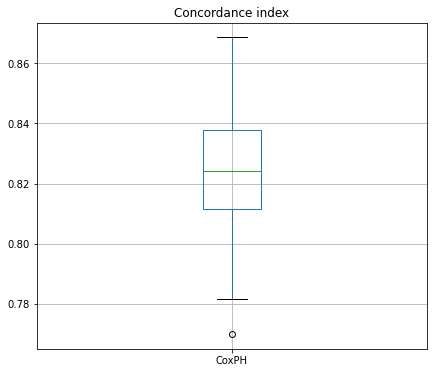

In [23]:
df = pd.DataFrame(C_Idx)
df.columns = ['CoxPH']

plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['CoxPH'])
plt.title('Concordance index')
plt.show()

In [24]:
# Cross-validation is not necessary when using random forest, 
# because multiple bagging in process of training random forest prevents over-fitting.

## 2-1-2. C-index on Test set

In [25]:
from lifelines.utils import concordance_index
cph = CoxPHFitter().fit(df_test, 'time_real', 'status_real')
print('COXPH shows c-index ', concordance_index(df_test['time_real'], -cph.predict_partial_hazard(df_test), df_test['status_real']))

COXPH shows c-index  0.8134441281321331


In [26]:
print('RSF shows c-index ', rsf.score(df_test.iloc[:, :-2], y_test_rsf))

RSF shows c-index  0.8101356723346413


Calibration 평가

ICI =  0.19893757884646374
E50 =  0.20219005120442657


C:\Users\hyji1\anaconda3\lib\site-packages\lifelines\calibration.py:45: RuntimeWarning: divide by zero encountered in log
  return np.log(-np.log(1 - p))
C:\Users\hyji1\anaconda3\lib\site-packages\lifelines\fitters\mixins.py:19: RuntimeWarning: invalid value encountered in subtract
  return self.relu(x - knot) ** 3 - (lambda_ * self.relu(x - min_knot) ** 3 + (1 - lambda_) * self.relu(x - max_knot) ** 3)


(<AxesSubplot:title={'center':'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 700 mortality'}, xlabel='Predicted probability of \nt ≤ 700 mortality', ylabel='Observed probability of \nt ≤ 700 mortality'>,
 0.19893757884646374,
 0.20219005120442657)

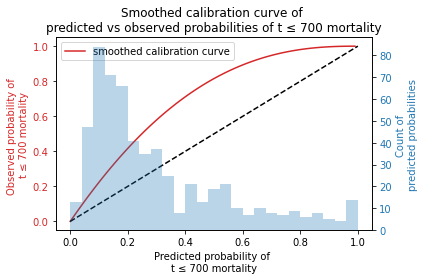

In [27]:
from lifelines.calibration import survival_probability_calibration

survival_probability_calibration(cph, df_test, t0=700)

비례위험 가정 검토

In [28]:
print(cph.check_assumptions(training_df=df_test, p_value_threshold=0.05))

Proportional hazard assumption looks okay.
[]


## 2-2. Individual Prediction on Test set

In [29]:
df_test_X = df_test.drop(columns=['time_real', 'status_real'])

In [30]:
# Selecting 3 random subjects to predict survival
test_1 = df_test_X.iloc[-7:-2, :]

In [31]:
result = cph.predict_survival_function(test_1)

Text(0.5, 1.0, 'COXPH')

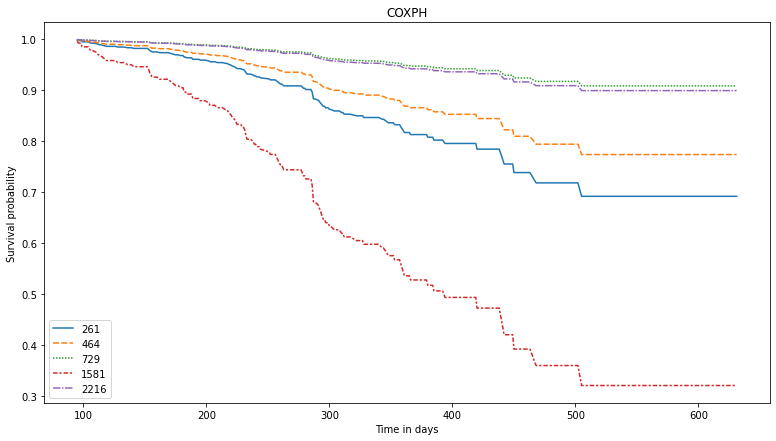

In [32]:
fig, ax = plt.subplots(figsize=(13,7))
result = cph.predict_survival_function(test_1)
ax = sns.lineplot(data = result)
ax.set(xlabel='Time in days', ylabel='Survival probability')
ax.set_title("COXPH")

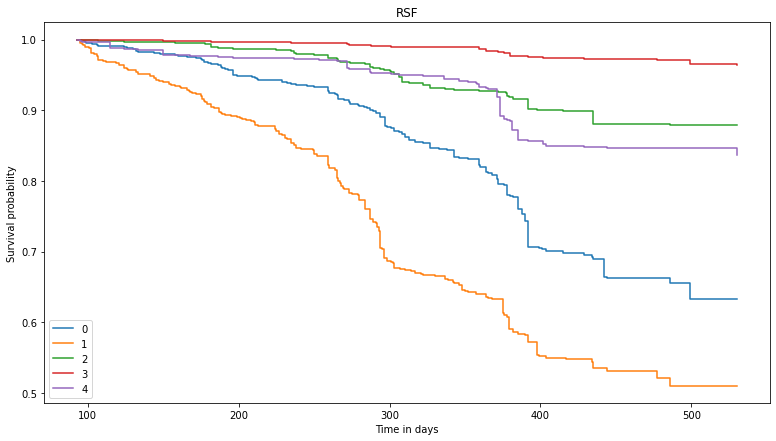

In [35]:
surv = rsf.predict_survival_function(df_test.iloc[-7:-2, :-2], return_array=True)

plt.figure(figsize=(13,7))

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.title('RSF')
plt.legend()
plt.show()

In [34]:
df_test.iloc[-7:-2, -2:]

,time_real,status_real
729,262,0
1581,359,1
2216,273,0
464,375,0
261,133,0
